# Filtro Digital IIR - Transformada Bilineal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib
import scipy.signal as signal
import warnings
#import mpld3
#mpld3.enable_notebook()
warnings.filterwarnings("ignore")

/opt/homebrew/Caskroom/miniconda/base/envs/sys_itba/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Transformación Bilineal

## Sistema Analogico

In [69]:
#Definicion sistema
w0 = 15*2*np.pi
t_c = np.arange(0,10,0.01)

# Elegimos el tiempo de muestreo acorde
f_max = 1000
T = 1/(2*f_max)
print("Maxima frecuencia que se busca representar: ", f_max)
print("Tiempo de muestreo seleccionado: ", T)

w = np.arange(0.001,f_max*2*np.pi,0.01)

sys_1 = signal.lti([0,w0], [1,w0])

print("Filtro PB con frecuencia de corte w0 = {} [rad/seg]".format(w0))

Maxima frecuencia que se busca representar:  200
Tiempo de muestreo seleccionado:  0.0025
Filtro PB con frecuencia de corte w0 = 94.24777960769379 [rad/seg]


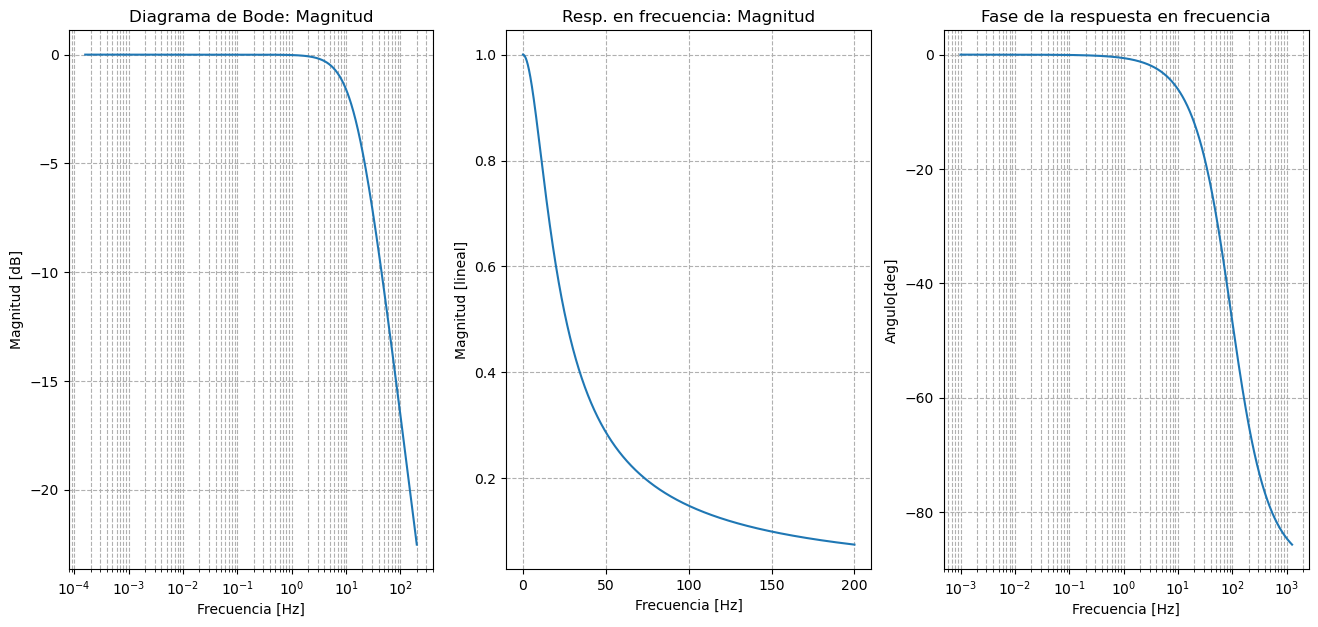

In [70]:
# Respuesta en Frecuencia
w_log, mag_dB, fase = signal.bode(sys_1,w=w)
w, H_analog = signal.freqresp(sys_1,w=w)
mag_lin_analog = abs(H_analog) #magnitud
fase_analog = np.angle(H_analog, deg=True) #/np.pi #fase[rad]

fig1, ax1 = plt.subplots(1, 3, figsize=(16,7))
#2 magnitud bode
ax1[0].semilogx(w_log/(2*np.pi),mag_dB)
ax1[0].set_title("Diagrama de Bode: Magnitud")
ax1[0].set_xlabel("Frecuencia [Hz]")  
ax1[0].set_ylabel("Magnitud [dB]")
ax1[0].grid(linestyle='--', which="both")#grilla punteada para escala logaritmica

#2 magnitud lineal
ax1[1].plot(w/(2*np.pi),mag_lin_analog)
ax1[1].set_title("Resp. en frecuencia: Magnitud")
ax1[1].set_xlabel("Frecuencia [Hz]")  
ax1[1].set_ylabel("Magnitud [lineal]")
ax1[1].grid(linestyle='--', which="both")#grilla punteada para escala logaritmica

#3 fase
ax1[2].semilogx(w_log,fase)
ax1[2].set_title("Fase de la respuesta en frecuencia")
ax1[2].set_xlabel("Frecuencia [Hz]")
ax1[2].set_ylabel("Angulo[deg]")
ax1[2].grid(linestyle='--', which="both")#grilla punteada
fig1.show()

### Sistema Digital equivalente

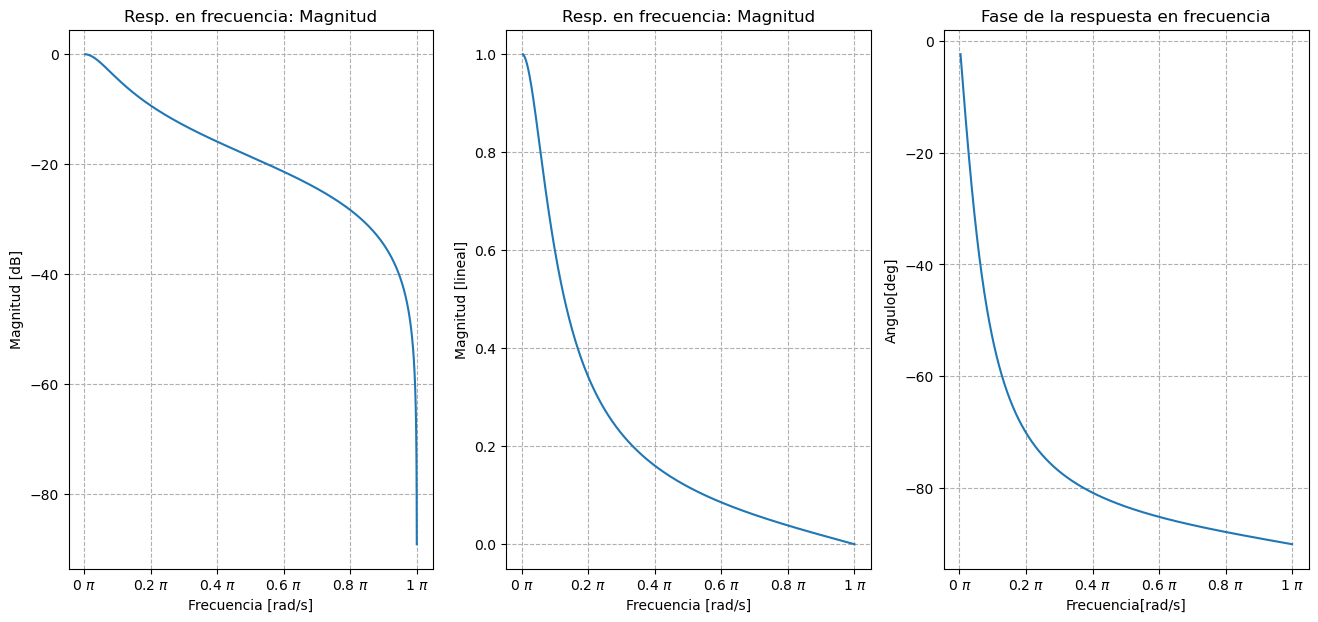

In [71]:
# Obtenemos el sistema digital mediante la utilizacion de la tranformacion bilineal (en la siguiente linea de codigo)
sys_dig_1 = signal.dlti((T*w0/(2+w0*T))*np.array([1,1]), [1,(w0*T-2)/(w0*T+2)])
Omega = np.arange(1/100,np.pi,0.001)

#respuesta en frecuencia
Omega_log, mag1_dB, fase1 = signal.dbode(sys_dig_1, w=Omega)
Omega1, H_dig = signal.dfreqresp(sys_dig_1,w=Omega)
mag_lin_dig = abs(H_dig) #magnitud
fase_dig = np.angle(H_dig, deg = True) #fase[deg]

fig2, ax2 = plt.subplots(1, 3, figsize=(16, 7))
#2 magnitud
ax2[0].plot(Omega/np.pi,mag1_dB)
ax2[0].set_title("Resp. en frecuencia: Magnitud")
ax2[0].set_xlabel("Frecuencia [rad/s]")  
ax2[0].set_ylabel("Magnitud [dB]")
ax2[0].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax2[0].grid(linestyle='--', which="both")#grilla punteada para escala logaritmica

ax2[1].plot(Omega1/np.pi,mag_lin_dig)
ax2[1].set_title("Resp. en frecuencia: Magnitud")
ax2[1].set_xlabel("Frecuencia [rad/s]")  
ax2[1].set_ylabel("Magnitud [lineal]")
ax2[1].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax2[1].grid(linestyle='--', which="both")#grilla punteada para escala logaritmica

#3 fase
ax2[2].plot(Omega/np.pi,fase1)
ax2[2].set_title("Fase de la respuesta en frecuencia")
ax2[2].set_xlabel("Frecuencia[rad/s]")
ax2[2].set_ylabel("Angulo[deg]")
ax2[2].grid(linestyle='--', which="both")#grilla punteada
ax2[2].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
#ax3.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
fig2.show()

### Superponemos ambas respuestas en frecuencia

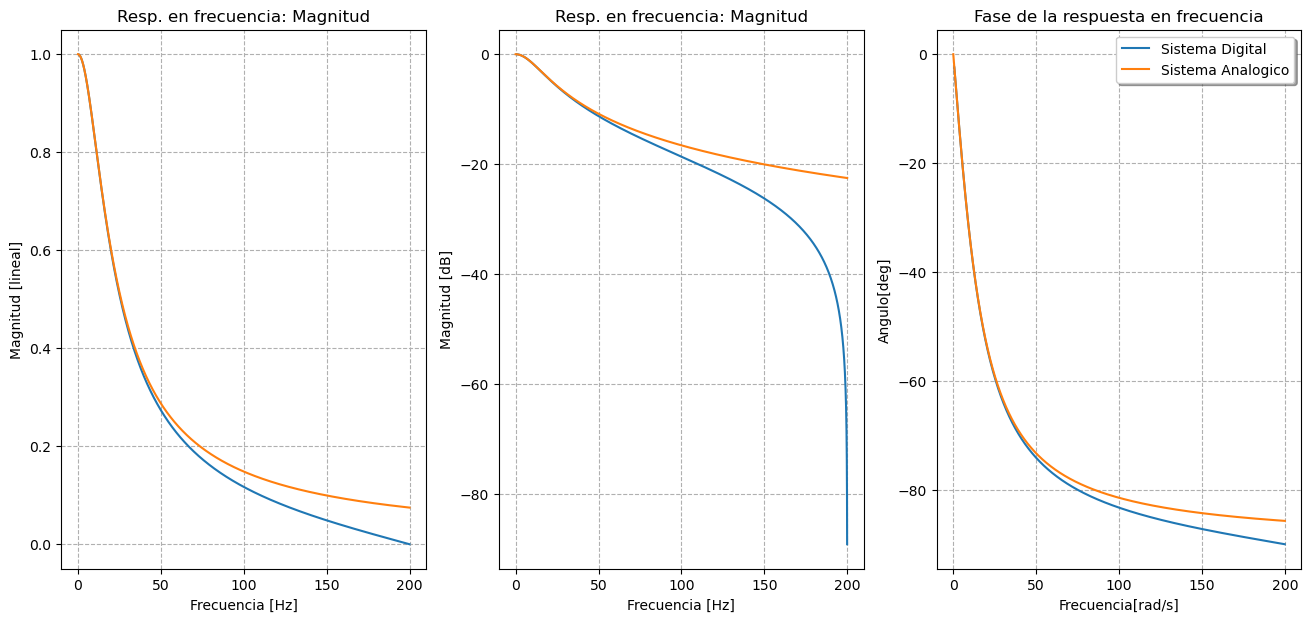

In [72]:
#respuesta en frecuencia
f_dig = Omega1/np.pi*1/(2*T)
f_analog = w/(2*np.pi) 

fig3, ax3 = plt.subplots(1, 3, figsize=(16, 7))
#2 magnitud
ax3[0].plot(f_dig,mag_lin_dig)
ax3[0].plot(f_analog,mag_lin_analog)
ax3[0].set_title("Resp. en frecuencia: Magnitud")
ax3[0].set_xlabel("Frecuencia [Hz]")  
ax3[0].set_ylabel("Magnitud [lineal]")
ax3[0].grid(linestyle='--', which="both")#grilla punteada para escala logaritmica

#ax3[1].semilogx(f_dig,mag2_dB)
#ax3[1].semilogx(f_analog,mag_dB)
ax3[1].plot(f_dig,mag1_dB)
ax3[1].plot(f_analog,mag_dB)
ax3[1].set_title("Resp. en frecuencia: Magnitud")
ax3[1].set_xlabel("Frecuencia [Hz]")  
ax3[1].set_ylabel("Magnitud [dB]")
ax3[1].grid(linestyle='--', which="both")#grilla punteada para escala logaritmica


ax3[2].plot(f_dig,fase_dig)
ax3[2].plot(f_analog,fase_analog)
ax3[2].legend(('Sistema Digital', 'Sistema Analogico'), loc='upper right', shadow=True)
ax3[2].set_title("Fase de la respuesta en frecuencia")
ax3[2].set_xlabel("Frecuencia[rad/s]")
ax3[2].set_ylabel("Angulo[deg]")
ax3[2].grid(linestyle='--', which="both")#grilla punteada

fig3.show()

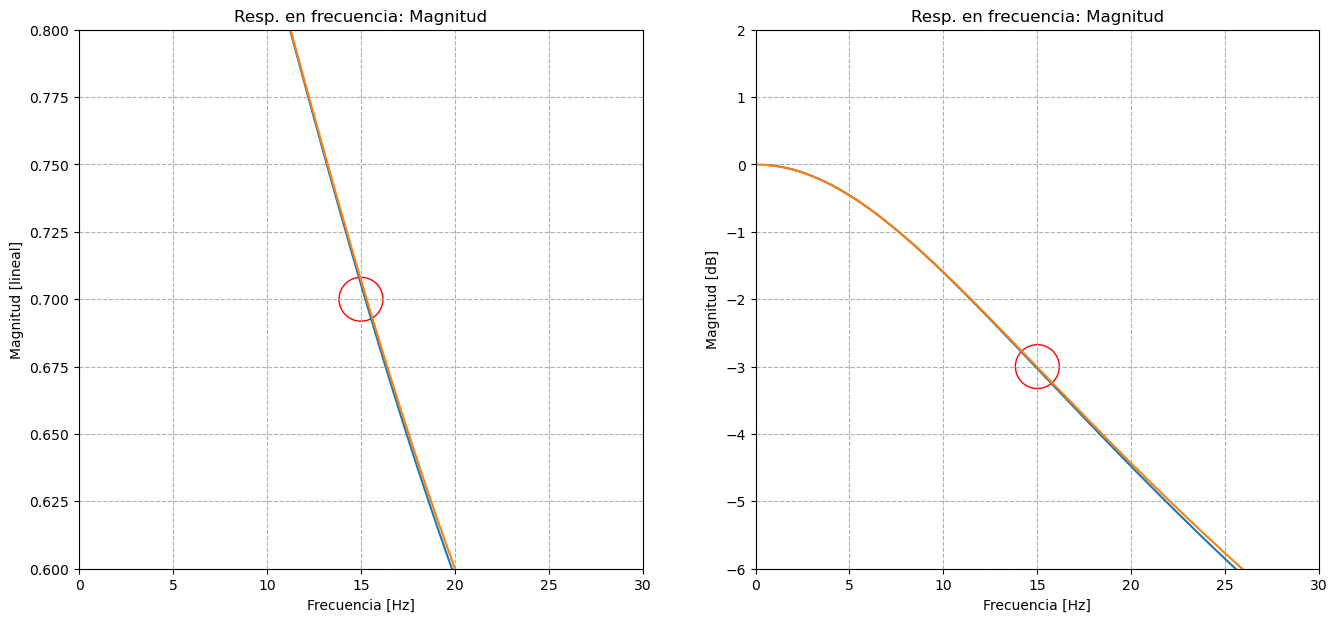

In [73]:

fig4, ax4 = plt.subplots(1, 2, figsize=(16, 7))
#2 magnitud
ax4[0].plot(f_dig,mag_lin_dig)
ax4[0].plot(f_analog,mag_lin_analog)
ax4[0].set_title("Resp. en frecuencia: Magnitud")
ax4[0].set_xlabel("Frecuencia [Hz]")  
ax4[0].set_ylabel("Magnitud [lineal]")
ax4[0].grid(linestyle='--', which="both")#grilla punteada para escala logaritmica
ax4[0].set_xlim(0,(w0*2)/(2*np.pi))
ax4[0].set_ylim(0.6,0.8)
ax4[0].scatter(w0/(2*np.pi), 0.7, facecolors='none', edgecolors='r', s=1000)

#ax4[1].semilogx(f_dig,mag2_dB)
#ax4[1].semilogx(f_analog,mag_dB)
ax4[1].plot(f_dig,mag1_dB)
ax4[1].plot(f_analog,mag_dB)
ax4[1].set_title("Resp. en frecuencia: Magnitud")
ax4[1].set_xlabel("Frecuencia [Hz]")  
ax4[1].set_ylabel("Magnitud [dB]")
ax4[1].grid(linestyle='--', which="both")#grilla punteada para escala logaritmica
ax4[1].set_xlim(0,(w0*2)/(2*np.pi))
ax4[1].set_ylim(-6,2)
ax4[1].scatter(w0/(2*np.pi), -3, facecolors='none', edgecolors='r', s=1000)

fig4.show()

In [74]:
w_log_w0, mag_dB_w0, fase_w0 = signal.bode(sys_1,w=w0)
print("Magnitud en w = w0: ", mag_dB_w0)

Omega_log_w0, mag1_dB_w0, fase1_w0 = signal.dbode(sys_dig_1, w=(w0/(np.pi*2))*np.pi/(1/T/2))
print("Magnitud en Omega = Omega0: ", mag1_dB_w0)

Magnitud en w = w0:  [-3.01029996]
Magnitud en Omega = Omega0:  [-3.03050416]


## Prewarping

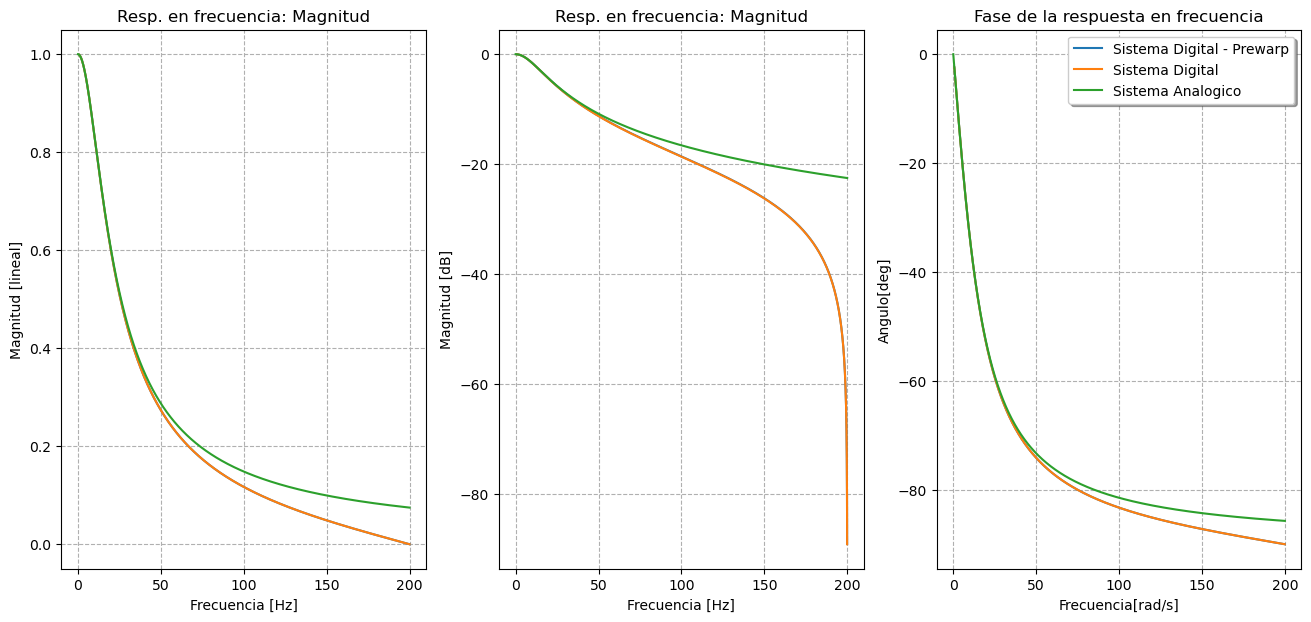

In [78]:
#Aplicamos pre-warping sobre la frecuencia de corte e implementamos la transformacion bilineal
w0_prewarp = 2/T*np.tan(w0*T/2)

sys_dig_prewarp = signal.dlti((T*w0_prewarp/(2+w0_prewarp*T))*np.array([1,1]), [1,(w0_prewarp*T-2)/(w0_prewarp*T+2)])
Omega = np.arange(1/100,np.pi,0.001)

#respuesta en frecuencia
Omega_log, mag2_dB, fase2 = signal.dbode(sys_dig_prewarp, w=Omega)
Omega2, H_dig_prewarp = signal.dfreqresp(sys_dig_1,w=Omega)
mag_lin_dig_prewarp = abs(H_dig) #magnitud
fase_dig_prewarp = np.angle(H_dig_prewarp, deg = True) #fase[deg]

f_dig = Omega1/np.pi*1/(2*T)
f_analog = w/(2*np.pi) 

fig5, ax5 = plt.subplots(1, 3, figsize=(16, 7))
#2 magnitud
ax5[0].plot(f_dig,mag_lin_dig_prewarp)
ax5[0].plot(f_dig,mag_lin_dig)
ax5[0].plot(f_analog,mag_lin_analog)
ax5[0].set_title("Resp. en frecuencia: Magnitud")
ax5[0].set_xlabel("Frecuencia [Hz]")  
ax5[0].set_ylabel("Magnitud [lineal]")
ax5[0].grid(linestyle='--', which="both")#grilla punteada para escala logaritmica

#ax5[1].semilogx(f_dig,mag2_dB)
#ax5[1].semilogx(f_analog,mag_dB)
ax5[1].plot(f_dig,mag2_dB)
ax5[1].plot(f_dig,mag1_dB)
ax5[1].plot(f_analog,mag_dB)
#ax5[1].set_xlim(14,17)
#ax5[1].set_ylim(-3.25,-2.75)
ax5[1].set_title("Resp. en frecuencia: Magnitud")
ax5[1].set_xlabel("Frecuencia [Hz]")  
ax5[1].set_ylabel("Magnitud [dB]")
ax5[1].grid(linestyle='--', which="both")#grilla punteada para escala logaritmica


ax5[2].plot(f_dig,fase_dig_prewarp)
ax5[2].plot(f_dig,fase_dig)
ax5[2].plot(f_analog,fase_analog)
ax5[2].legend(('Sistema Digital - Prewarp', 'Sistema Digital','Sistema Analogico'), loc='upper right', shadow=True)
ax5[2].set_title("Fase de la respuesta en frecuencia")
ax5[2].set_xlabel("Frecuencia[rad/s]")
ax5[2].set_ylabel("Angulo[deg]")
ax5[2].grid(linestyle='--', which="both")#grilla punteada

fig5.show()

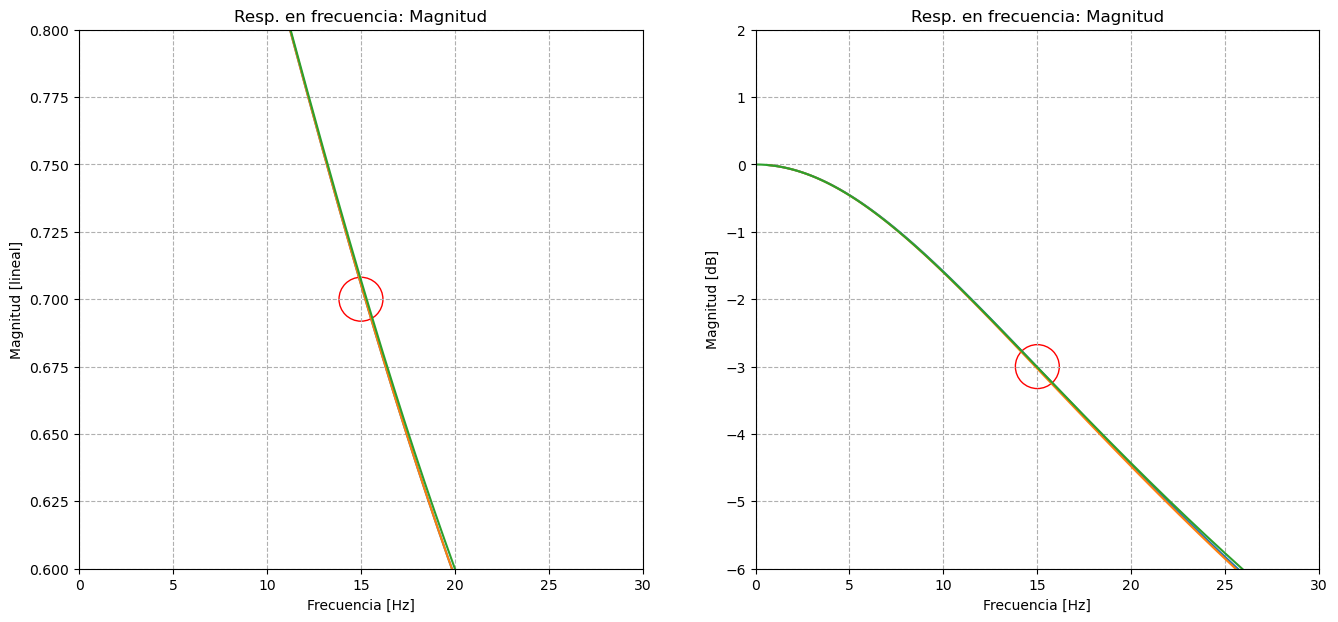

In [80]:
fig6, ax6 = plt.subplots(1, 2, figsize=(16, 7))
#2 magnitud
ax6[0].plot(f_dig,mag_lin_dig_prewarp)
ax6[0].plot(f_dig,mag_lin_dig)
ax6[0].plot(f_analog,mag_lin_analog)
ax6[0].set_title("Resp. en frecuencia: Magnitud")
ax6[0].set_xlabel("Frecuencia [Hz]")  
ax6[0].set_ylabel("Magnitud [lineal]")
ax6[0].grid(linestyle='--', which="both")#grilla punteada para escala logaritmica
ax6[0].set_xlim(0,(w0*2)/(2*np.pi))
ax6[0].set_ylim(0.6,0.8)
ax6[0].scatter(w0/(2*np.pi), 0.7, facecolors='none', edgecolors='r', s=1000)

#ax6[1].semilogx(f_dig,mag2_dB)
#ax6[1].semilogx(f_analog,mag_dB)
ax6[1].plot(f_dig,mag2_dB)
ax6[1].plot(f_dig,mag1_dB)
ax6[1].plot(f_analog,mag_dB)
#ax6[1].set_xlim(14,17)
#ax6[1].set_ylim(-3.25,-2.75)
ax6[1].set_title("Resp. en frecuencia: Magnitud")
ax6[1].set_xlabel("Frecuencia [Hz]")  
ax6[1].set_ylabel("Magnitud [dB]")
ax6[1].grid(linestyle='--', which="both")#grilla punteada para escala logaritmica
ax6[1].set_xlim(0,(w0*2)/(2*np.pi))
ax6[1].set_ylim(-6,2)
ax6[1].scatter(w0/(2*np.pi), -3, facecolors='none', edgecolors='r', s=1000)

fig6.show()

In [81]:
w_log_w0, mag_dB_w0, fase_w0 = signal.bode(sys_1,w=w0)
print("Magnitud en w = w0: ", mag_dB_w0)

Omega_log_w0, mag1_dB_w0, fase1_w0 = signal.dbode(sys_dig_1, w=(w0/(np.pi*2))*np.pi/(1/T/2))
print("Magnitud en Omega = Omega0: ", mag1_dB_w0)

Omega_log_w0, mag2_dB_w0, fase2_w0 = signal.dbode(sys_dig_prewarp, w=(w0/(np.pi*2))*np.pi/(1/T/2))
print("Magnitud en Omega = Omega0 del sist con pre-warping: ", mag2_dB_w0)

Magnitud en w = w0:  [-3.01029996]
Magnitud en Omega = Omega0:  [-3.03050416]
Magnitud en Omega = Omega0 del sist con pre-warping:  [-3.01029996]


---------------------------------------------------------------------------------------

#### ACTIVIDAD: Como sera el caso para un filtro Pasa-Bajos?